<a href="https://colab.research.google.com/github/BrazsorsZ/mmvvsu/blob/main/%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [3]:
!pip install scikit-learn

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv')
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [147]:
#Удаление
df_cleaned = df.dropna()
df_cleaned

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,98.96687,97.30,8.79,810000.0,0.43,24.96,0.0,0.07,...,9961.640,4.07,78650.00000,0.065218,3.000000,1740.606654,18,2381741.0,28.033886,1.659626
44,Algeria,2002,98.95306,97.80,8.68,310000.0,0.51,25.94,0.0,0.06,...,10180.350,4.12,82400.00153,0.051677,5.600000,1781.828908,18,2381741.0,28.033886,1.659626
45,Algeria,2003,98.93401,98.00,8.57,90000.0,0.47,27.54,0.0,0.26,...,10510.461,4.08,88190.00244,0.228104,7.200000,2103.381291,18,2381741.0,28.033886,1.659626
46,Algeria,2004,98.91208,98.20,8.46,140000.0,0.44,29.14,0.0,0.25,...,10759.022,3.96,89489.99786,0.206787,4.300000,2610.185422,18,2381741.0,28.033886,1.659626
47,Algeria,2005,98.88961,98.50,8.34,160000.0,0.58,31.36,0.0,0.55,...,11113.723,3.90,94190.00244,0.434119,5.900000,3113.094883,18,2381741.0,28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Uzbekistan,2015,100.00000,85.35,60.83,270000.0,1.71,47.55,0.0,7.00,...,17386.195,7.86,99169.99817,3.012993,7.218774,2753.971072,79,447400.0,41.377491,64.585262
3560,Uzbekistan,2016,100.00000,85.20,59.88,690000.0,1.61,48.75,0.0,7.25,...,16374.342,7.82,105230.00340,3.567936,5.932151,2704.677188,79,447400.0,41.377491,64.585262
3561,Uzbekistan,2017,100.00000,84.90,58.24,60130000.0,1.75,49.71,0.0,8.35,...,16642.676,7.88,109529.99880,3.972285,4.395275,1916.764642,79,447400.0,41.377491,64.585262
3562,Uzbekistan,2018,100.00000,84.30,59.09,84130000.0,1.49,53.58,0.0,5.85,...,16445.740,9.05,112470.00120,2.927033,5.354997,1597.068337,79,447400.0,41.377491,64.585262


**Мы удалили 3206 строк, так как в них содержались NaN Значения**

In [148]:
#Заполнение при помощи медианы
df_filled_median = df.fillna(df.median())
df_filled_median

<ipython-input-148-f1b9ff7c16e4>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,6.290766,3.559855,4578.633208,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,6.290766,3.559855,4578.633208,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,6.290766,3.559855,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,6.290766,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,5665000.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,6.290766,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,6.290766,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,6.290766,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,6.290766,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,6.290766,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [149]:
#Заполнение при помощи среднего
df_mean = df.fillna(df.mean())
df_mean

<ipython-input-149-e0087b33fdf5>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean = df.fillna(df.mean())


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,11.986707,3.441610,13283.774348,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,11.986707,3.441610,13283.774348,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,11.986707,3.441610,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,11.986707,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,94224000.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,11.986707,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,11.986707,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,11.986707,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,11.986707,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,11.986707,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [150]:
#Заполнение при помощи моды
df_mode = pd.DataFrame(columns = df.columns)
for col in df.columns:
  df_mode[col] = df[col].fillna(df[col].mode()[0])
df_mode

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,0.0,0.200000,111.927225,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,0.0,0.200000,111.927225,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,0.0,0.200000,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,0.0,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,10000.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,0.0,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,0.0,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,0.0,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,0.0,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,0.0,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [151]:
#Заполнение при помощи интерполяции
df_interpolated = df.interpolate(method='linear')
df_interpolated

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,17900000.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,2.523421,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,2.523421,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,2.523421,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,2.523421,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [152]:
df["Renewables (% equivalent primary energy)"].describe()

count    1512.000000
mean       11.986707
std        14.994644
min         0.000000
25%         2.137095
50%         6.290766
75%        16.841638
max        86.836586
Name: Renewables (% equivalent primary energy), dtype: float64

In [153]:
df_cleaned["Renewables (% equivalent primary energy)"].describe()

count    343.000000
mean      12.062470
std       12.011861
min        0.003802
25%        2.942325
50%        7.311432
75%       16.982943
max       47.304844
Name: Renewables (% equivalent primary energy), dtype: float64

In [154]:
df_filled_median["Renewables (% equivalent primary energy)"].describe()

count    3649.000000
mean        8.650937
std        10.050050
min         0.000000
25%         6.290766
50%         6.290766
75%         6.290766
max        86.836586
Name: Renewables (% equivalent primary energy), dtype: float64

In [155]:
df_mean["Renewables (% equivalent primary energy)"].describe()

count    3649.000000
mean       11.986707
std         9.650304
min         0.000000
25%         9.674950
50%        11.986707
75%        11.986707
max        86.836586
Name: Renewables (% equivalent primary energy), dtype: float64

In [156]:
df_mode["Renewables (% equivalent primary energy)"].describe()

count    3649.000000
mean        4.966813
std        11.313904
min         0.000000
25%         0.000000
50%         0.000000
75%         4.291226
max        86.836586
Name: Renewables (% equivalent primary energy), dtype: float64

In [157]:
df_interpolated["Renewables (% equivalent primary energy)"].describe()

count    3607.000000
mean       12.088286
std        12.415533
min         0.000000
25%         2.915864
50%         7.344336
75%        18.120573
max        86.836586
Name: Renewables (% equivalent primary energy), dtype: float64

**Объясните**

Исходя из анализа статистики, можно заключить, что выбранные способы обработки пропущенных значений были эффективными, поскольку данные после применения этих методов практически не изменились. Пропущенные значения были обработаны путем удаления, заполнения с использованием медианы или среднего (для числовых значений), моды (для категориальных значений) или интерполяции.

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


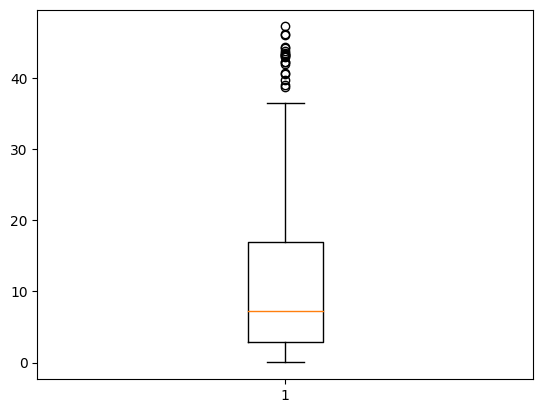

count    343.000000
mean      12.062470
std       12.011861
min        0.003802
25%        2.942325
50%        7.311432
75%       16.982943
max       47.304844
Name: Renewables (% equivalent primary energy), dtype: float64

In [86]:
#Методом среднего
df = df.dropna()
plt.boxplot(df["Renewables (% equivalent primary energy)"])
plt.show()
df["Renewables (% equivalent primary energy)"].describe()

**На Боксплоте можно заметить выбросы, но данные значения не являются критическими, так как есть страны в которых могут быть такое кол-во возобновляемых ресурсов**

In [87]:
mean = df["Renewables (% equivalent primary energy)"].mean()
std_deviation = df["Renewables (% equivalent primary energy)"].std()
threshold = 3 * std_deviation


# Идентифицируем выбросы
outliers = [x for x in df["Renewables (% equivalent primary energy)"] if abs(x - mean) > threshold]
# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print('Межквартальный размах:', df['Renewables (% equivalent primary energy)'].quantile(0.75)-df['Renewables (% equivalent primary energy)'].quantile(0.25))
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 12.062470484416911
Стандартное отклонение данных: 12.011861383807503
Межквартальный размах: 14.040617999999998
Потенциальные выбросы: []


**С помощью метода, основанном на среднем, мы не обнаружили выбросы**

In [94]:
q1 = df['Renewables (% equivalent primary energy)'].quantile(0.25)
q3 = df['Renewables (% equivalent primary energy)'].quantile(0.75)
q = q3 - q1
lower = q1 - 1.5*q
upper = q3 + 1.5*q
outliers2 = [x1 for x1 in df['Renewables (% equivalent primary energy)'] if ((x1 < lower) or (x1 > upper))]
print('Потенциальные выбросы:', outliers2)

Потенциальные выбросы: [43.288433, 39.11162, 40.756653, 42.284126, 42.286156, 43.1457, 43.045963, 44.380226, 43.366776, 46.30883, 44.246536, 43.91006, 42.06637, 39.836597, 38.852745, 40.603523, 43.5387, 43.280678, 46.080498, 47.304844]


**А вот с помощью метода, основанном на межквартальном размахе, мы обнаружили выбросы, которые видны на боксплоте**

In [111]:
df_1 = df.copy()
df_1 = df_1[df_1['Renewables (% equivalent primary energy)'] < upper]

In [113]:
df_1['Renewables (% equivalent primary energy)'].describe()

count    307.000000
mean       8.917718
std        7.996624
min        0.003802
25%        2.641247
50%        6.473570
75%       12.908254
max       31.769020
Name: Renewables (% equivalent primary energy), dtype: float64

**Мы удалили выбросы по межквартальному методу, но в нашем случае больше всего подходит метод, основанный на среднем, так как я писал выше, что выбросы на боксплоте не являются критическими.**

**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [60]:
#Проверка на дубли
df_duplicated = df[df.duplicated()]
df_duplicated

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude


**ДУБЛИ НЕ ОБНАРУЖЕНЫ!**

In [61]:
df = pd.concat((df, df.loc[0:100]))

In [62]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Antigua and Barbuda,2012,100.000000,100.0,3.32,NaN,0.15,0.31,0.0,0.00,...,33159.37000,4.08,699.999988,NaN,3.372866,13272.734940,223,443.0,17.060816,-61.796428
97,Antigua and Barbuda,2013,100.000000,100.0,4.37,2580000.0,0.15,0.31,0.0,0.00,...,32853.87500,4.13,469.999999,NaN,-0.600876,12910.590630,223,443.0,17.060816,-61.796428
98,Antigua and Barbuda,2014,100.000000,100.0,4.32,NaN,0.14,0.32,0.0,0.00,...,33313.00000,4.01,479.999989,NaN,3.795728,13501.580920,223,443.0,17.060816,-61.796428
99,Antigua and Barbuda,2015,100.000000,100.0,36.34,6970000.0,0.48,0.32,0.0,0.01,...,33830.76000,3.98,490.000009,NaN,3.825293,14285.329780,223,443.0,17.060816,-61.796428


**Мы добавили 101 дубль**

In [63]:
#Удаление дублей
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


**Дубли убраны**

## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [22]:
num_features = df.select_dtypes(include=['float64']).columns
num_features

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Land Area(Km2)'],
      dtype='object')

In [35]:
df['Year'] = df['Year'].astype('category')
df['Latitude'] = df['Latitude'].astype('category')
df['Longitude'] = df['Longitude'].astype('category')
df = df.dropna()

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])
df_minmax_scaled.gdp_growth.unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array([0.55732409, 0.59386242, 0.61634754, 0.57559325, 0.59807838,
       0.5376496 , 0.56575601, 0.55591877, 0.56294537, 0.55451345,
       0.56856665, 0.56716133, 0.56013473, 0.53343364, 0.530623  ,
       0.52921768, 0.45320616, 0.63935321, 0.64205891, 0.63955866,
       0.62825274, 0.64175083, 0.5721816 , 0.43199024, 0.65745876,
       0.59953923, 0.50073998, 0.54896698, 0.47985418, 0.55354602,
       0.48592921, 0.55477348, 0.47838167, 0.48669361, 0.67115503,
       0.90811366, 1.        , 0.64580817, 0.58611832, 0.5165698 ,
       0.55381791, 0.53053834, 0.47159955, 0.51797512, 0.58955223,
       0.56903215, 0.58177058, 0.5887967 , 0.60701544, 0.60892612,
       0.61436041, 0.59967749, 0.58606464, 0.59346595, 0.60600971,
       0.60681187, 0.5996749 , 0.60034178, 0.60725006, 0.61513164,
       0.61753046, 0.62567541, 0.62973581, 0.57682923, 0.53469698,
       0.5580754 , 0.53119678, 0.59611043, 0.56016469, 0.57084311,
       0.60046561, 0.58675424, 0.51339642, 0.62096017, 0.57101

In [37]:
standard_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = standard_scaler.fit_transform(df[num_features])
df_std_scaled.gdp_growth.unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array([-3.68588686e-01,  2.34960917e-01,  6.06376058e-01, -6.68138843e-02,
        3.04601256e-01, -6.93576934e-01, -2.29308008e-01, -3.91802132e-01,
       -2.75734901e-01, -4.15015578e-01, -1.82881116e-01, -2.06094562e-01,
       -3.22161793e-01, -7.63217272e-01, -8.09644165e-01, -8.32857611e-01,
       -2.08843571e+00,  9.86389643e-01,  1.03108307e+00,  9.89783246e-01,
        8.03029116e-01,  1.02599412e+00, -1.23168448e-01, -2.43888571e+00,
        1.28546179e+00,  3.28732026e-01, -1.30325963e+00, -5.06633530e-01,
       -1.64825668e+00, -4.30995755e-01, -1.54790786e+00, -4.10720400e-01,
       -1.67258000e+00, -1.53528123e+00,  1.51170035e+00,  5.42584454e+00,
        6.94364689e+00,  1.09301427e+00,  1.07041960e-01, -1.04177863e+00,
       -4.26504602e-01, -8.11042579e-01, -1.78460891e+00, -1.01856518e+00,
        1.63764051e-01, -1.75191908e-01,  3.52248577e-02,  1.51284083e-01,
        4.52225993e-01,  4.83787004e-01,  5.73552095e-01,  3.31015781e-01,
        1.06155259e-01,  

In [38]:
df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled[num_features] = df_std_scaled[num_features]
df_scaled

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,0.714295,1.003142,-0.898709,-0.459120,-1.360278,-0.328082,-0.309815,-0.380374,...,-0.281855,-0.266010,-0.318251,-1.000243,-0.368589,-0.841218,18,0.139139,28.033886,1.659626
44,Algeria,2002,0.713256,1.020809,-0.899599,-0.460412,-1.355709,-0.326855,-0.309815,-0.380413,...,-0.259360,-0.249240,-0.316251,-1.001372,0.234961,-0.828222,18,0.139139,28.033886,1.659626
45,Algeria,2003,0.711822,1.027876,-0.900489,-0.460981,-1.357993,-0.324853,-0.309815,-0.379629,...,-0.225408,-0.262656,-0.313163,-0.986663,0.606376,-0.726845,18,0.139139,28.033886,1.659626
46,Algeria,2004,0.710171,1.034943,-0.901379,-0.460852,-1.359707,-0.322852,-0.309815,-0.379668,...,-0.199844,-0.302904,-0.312470,-0.988440,-0.066814,-0.567064,18,0.139139,28.033886,1.659626
47,Algeria,2005,0.708479,1.045543,-0.902350,-0.460800,-1.351710,-0.320074,-0.309815,-0.378491,...,-0.163363,-0.323028,-0.309963,-0.969487,0.304601,-0.408511,18,0.139139,28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Uzbekistan,2015,0.792068,0.580896,-0.477607,-0.460516,-1.287167,-0.299817,-0.309815,-0.353182,...,0.481762,1.005145,-0.307307,-0.754479,0.610734,-0.521733,79,-0.569549,41.377491,64.585262
3560,Uzbekistan,2016,0.792068,0.575596,-0.485294,-0.459430,-1.292879,-0.298315,-0.309815,-0.352201,...,0.377693,0.991729,-0.304075,-0.708212,0.312065,-0.537274,79,-0.569549,41.377491,64.585262
3561,Uzbekistan,2017,0.792068,0.564995,-0.498565,-0.305783,-1.284882,-0.297114,-0.309815,-0.347885,...,0.405291,1.011853,-0.301781,-0.674500,-0.044697,-0.785680,79,-0.569549,41.377491,64.585262
3562,Uzbekistan,2018,0.792068,0.543795,-0.491687,-0.243745,-1.299733,-0.292272,-0.309815,-0.357694,...,0.385036,1.404268,-0.300213,-0.761646,0.178087,-0.886472,79,-0.569549,41.377491,64.585262


Масштабируйте категориальные признаки через OneHotEncoder

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 43 to 3563
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            343 non-null    object  
 1   Year                                                              343 non-null    category
 2   Access to electricity (% of population)                           343 non-null    float64 
 3   Access to clean fuels for cooking                                 343 non-null    float64 
 4   Renewable-electricity-generating-capacity-per-capita              343 non-null    float64 
 5   Financial flows to developing countries (US $)                    343 non-null    float64 
 6   Renewable energy share in the total final energy consumption (%)  343 non-null    float64 
 7   Electricity from fossil 

In [47]:
cat_features = df.select_dtypes(include=['category']).columns
df_cat_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Удаление исходных категориальных признаков
cat_features

Index(['Year', 'Latitude', 'Longitude'], dtype='object')

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[cat_features])

# Получаем имена новых признаков
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005',
       'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Latitude_-30.559482', 'Latitude_-14.235004', 'Latitude_-9.189967',
       'Latitude_-1.831239', 'Latitude_4.570868', 'Latitude_7.873054',
       'Latitude_12.879721', 'Latitude_15.870032', 'Latitude_20.593684',
       'Latitude_23.634501', 'Latitude_23.684994', 'Latitude_28.033886',
       'Latitude_30.375321', 'Latitude_31.791702', 'Latitude_33.223191',
       'Latitude_35.86166', 'Latitude_38.969719', 'Latitude_40.143105',
       'Latitude_41.377491', 'Longitude_-78.183406',
       'Longitude_-75.015152', 'Longitude_-74.297333',
       'Longitude_-63.616672', 'Longitude_-51.92528',
       'Longitude_-7.09262', 'Longitude_1.659626', 'Longitude_22.937506',
       'Longitude_43.679291', 'Longitude_47.576927',

In [49]:
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns) # получаем датафрейм с закодированными признаками
df_encoded

,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Longitude_47.576927,Longitude_59.556278,Longitude_64.585262,Longitude_69.345116,Longitude_78.96288,Longitude_80.771797,Longitude_90.356331,Longitude_100.992541,Longitude_104.195397,Longitude_121.774017
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Добавляем новые закодированные признаки в копию датафрейма
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Удаление исходных категориальных признаков
df_copy = df_copy.drop(columns=cat_features)
df_copy

,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),...,Longitude_47.576927,Longitude_59.556278,Longitude_64.585262,Longitude_69.345116,Longitude_78.96288,Longitude_80.771797,Longitude_90.356331,Longitude_100.992541,Longitude_104.195397,Longitude_121.774017
43,Algeria,98.96687,97.30,8.79,810000.0,0.43,24.96,0.0,0.07,0.279664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,Algeria,98.95306,97.80,8.68,310000.0,0.51,25.94,0.0,0.06,0.230769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,Algeria,98.93401,98.00,8.57,90000.0,0.47,27.54,0.0,0.26,0.935252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,Algeria,98.91208,98.20,8.46,140000.0,0.44,29.14,0.0,0.25,0.850630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Algeria,98.88961,98.50,8.34,160000.0,0.58,31.36,0.0,0.55,1.723598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Uzbekistan,100.00000,85.35,60.83,270000.0,1.71,47.55,0.0,7.00,12.832264,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3560,Uzbekistan,100.00000,85.20,59.88,690000.0,1.61,48.75,0.0,7.25,12.946428,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3561,Uzbekistan,100.00000,84.90,58.24,60130000.0,1.75,49.71,0.0,8.35,14.381675,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3562,Uzbekistan,100.00000,84.30,59.09,84130000.0,1.49,53.58,0.0,5.85,9.843514,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])